In [1]:
# Imports
import calendar
import numpy as np
import squigglepy as sq
from squigglepy.numbers import K, M
from squigglepy import bayes
import matplotlib.pyplot as plt
from pprint import pprint
from datetime import datetime
print('Loaded...')

Loaded...


In [4]:
# Define model
starting_followers = 4474
current_followers = 4513
goal_date = datetime(2022, 11, 1, 0, 0, 0)
days_left = (goal_date - datetime.now()).days

days_in_month = calendar.monthrange(datetime.now().year, datetime.now().month)[1]
monthly_projection = ((current_followers - starting_followers) / (days_in_month - days_left)) * days_left
projection_weight = (days_left / days_in_month) ** 2
print('Monthly projection: {}, weight: {}'.format(int(round(monthly_projection)), round(projection_weight, 3)))
print('-')


def model():
    mean = sq.sample(sq.mixture([sq.lognorm(70, 500),
                                 sq.lognorm(monthly_projection * 0.5, monthly_projection * 2)],
                               weights=1 - projection_weight))
    followers = sq.sample(sq.poisson(mean)) if mean > 0 else mean
    return current_followers + followers

print('Loaded...')

Monthly projection: 82, weight: 0.459
-
Loaded...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:02<00:00, 3528.87it/s]


-
Mean: 4675.75, SD: 131.85
-
{1: 4545,
 5: 4559,
 10: 4568,
 20: 4583,
 30: 4597,
 40: 4614,
 50: 4633,
 60: 4657,
 70: 4694,
 80: 4744,
 90: 4840,
 95: 4940,
 99: 5163}


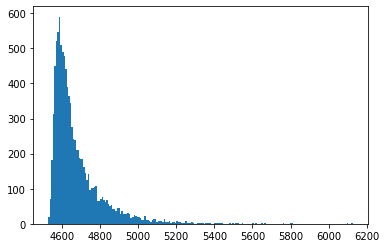

In [5]:
# Sample model
n_samples = 10000
samples = sq.sample(model, n=n_samples, verbose=True)

print('-')
print('Mean: {}, SD: {}'.format(round(np.mean(samples), 2),
                                round(np.std(samples), 2)))
print('-')
plt.hist(samples, bins=200)
pprint(sq.get_percentiles(samples, digits=0))


In [6]:
print(days_left)

21


## Expected average gains per day over the remainder of the month ##
{1: 1,
 5: 2,
 10: 2,
 20: 3,
 30: 4,
 40: 4,
 50: 5,
 60: 6,
 70: 8,
 80: 11,
 90: 15,
 95: 20,
 99: 30}


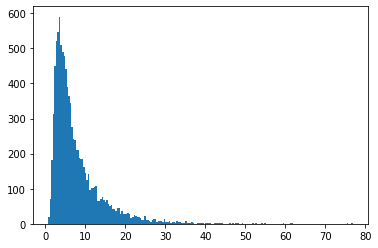

In [7]:
print('## Expected average gains per day over the remainder of the month ##')
s = (samples - current_followers) / days_left
plt.hist(s, bins=200)
pprint(sq.get_percentiles(s, digits=0))

In [8]:
for target in [4550, 4600, 4650, 4700, 4750, 4800, 4850, 4900, 5000]:
    print('{} - {}%'.format(target, int(sum([s >= target for s in samples]) / len(samples) * 100)))

4550 - 98%
4600 - 68%
4650 - 42%
4700 - 28%
4750 - 19%
4800 - 13%
4850 - 9%
4900 - 6%
5000 - 3%
